## CUSTOMER SEGMENTATION PROJECT

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

sns.set_style('darkgrid')
sns.set_palette('husl')

In [2]:
data = pd.read_csv('cleaned_marketing.csv')

In [3]:
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
data = data.astype({'ID':'object'})
# data['Dt_Customer'] = data['Dt_Customer'].apply(pd.to_datetime)

data['age'] = [2024 - x for x in data['Year_Birth']]
data.drop(columns=['Year_Birth'], inplace=True)

In [6]:
data['Marital_Status'] = ['single' if x in ['Single', 'Alone','Absurd', 'YOLO']
                          else x for x in data['Marital_Status']]

In [7]:
data.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
dtype: int64

In [8]:
# label encode the categorical variables

encoder = LabelEncoder()
cat_cols = ['Education', 'Marital_Status']

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [9]:
data.head(4)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,2,4,58138,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,2,4,46344,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,2,2,71613,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,2,2,26646,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,40


In [10]:
data.drop(['ID','Dt_Customer'], axis =1, inplace= True)

In [11]:
data = data[data['Income'] != ' '].copy()

In [12]:
data = data.astype({'Income':'int'})

In [13]:
data.reset_index(drop=True, inplace=True)

<Axes: >

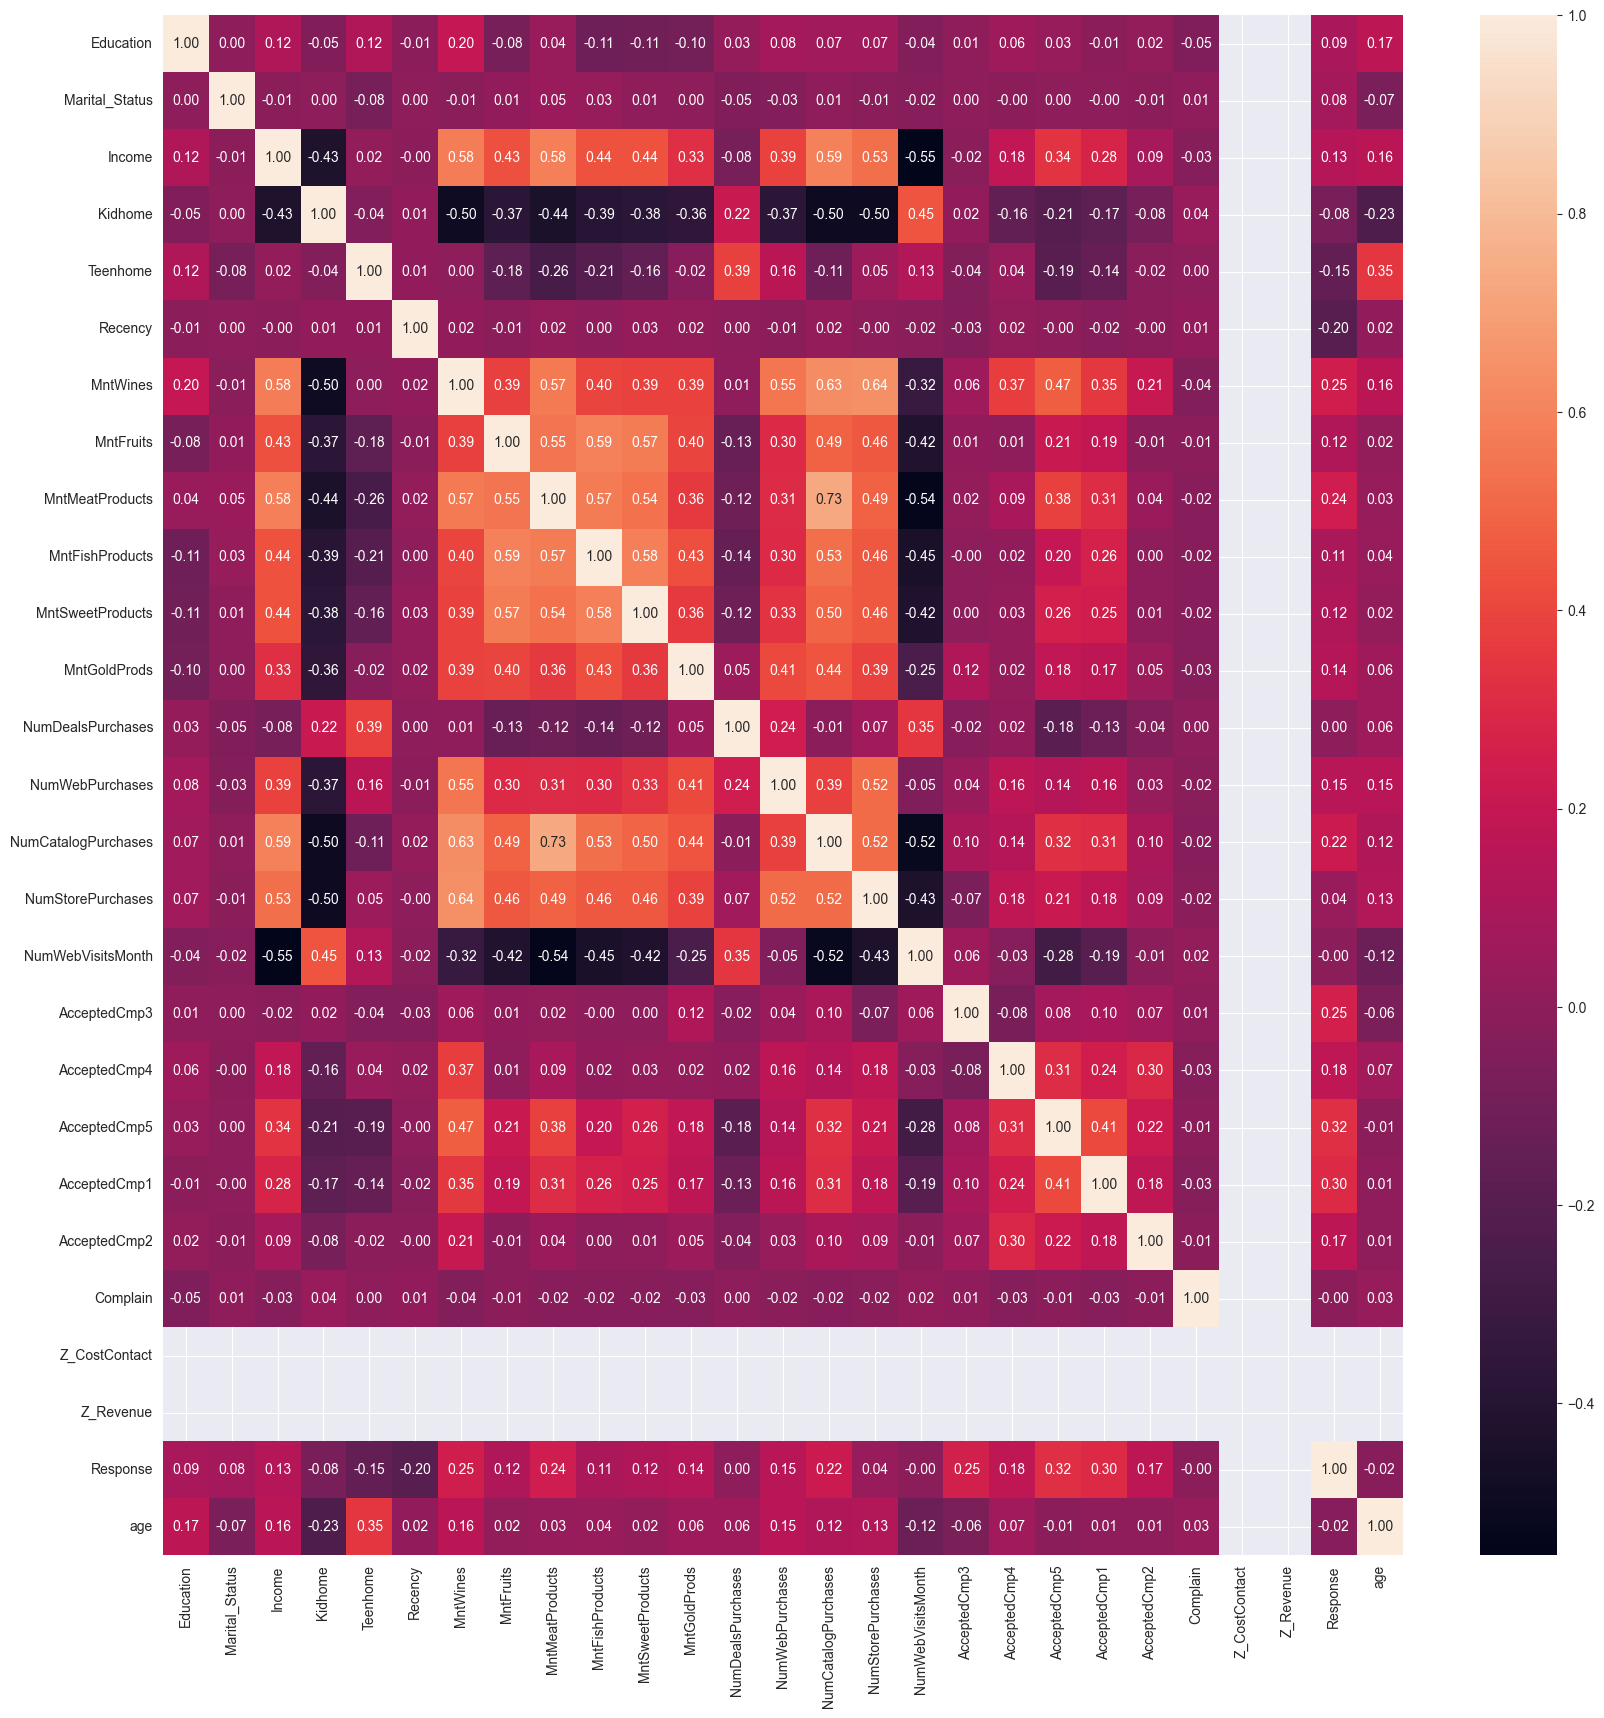

In [14]:
corr = data.corr(method='pearson')

fig = plt.figure(figsize= (20,20))
sns.heatmap(data = corr, fmt= '0.02f', annot=True) #fmt is used to intruct it the number of decimal places we want

In [15]:
# scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.35052725,  1.64091391,  0.2340627 , ...,  0.        ,
         2.37795178,  0.98644293],
       [-0.35052725,  1.64091391, -0.23455948, ...,  0.        ,
        -0.42052997,  1.23680074],
       [-0.35052725,  0.10044993,  0.76947764, ...,  0.        ,
        -0.42052997,  0.31882209],
       ...,
       [-0.35052725, -1.44001405,  0.18809052, ...,  0.        ,
        -0.42052997, -1.01641959],
       [ 0.53924181,  0.10044993,  0.67538765, ...,  0.        ,
        -0.42052997,  1.06989553],
       [ 1.42901088, -0.66978206,  0.02470453, ...,  0.        ,
         2.37795178,  1.23680074]])

In [16]:
data_scaled = pd.DataFrame(data = data_scaled, columns= data.columns)
data_scaled.head(3)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,-0.350527,1.640914,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,0.986443
1,-0.350527,1.640914,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.236801
2,-0.350527,0.100450,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.318822


In [17]:
#### FEATURE REDUCTION USING PRINCIPAL COMPONENT ANALYSIS (PCA) 
# (THIS RETURNS THE MOST CONTRIBUTED VARIABLES TO THE OUTCOME AS DIRECTED IT) IF WE SAID 4, IT WILL RETURN 4 THAT CONTRIBUTED MOST

pca = PCA(n_components= 3)

data_reduced = pca.fit_transform(data_scaled)

data_reduced = pd.DataFrame(data= data_reduced, columns= ['column1', 'column2', 'column3'])

data_reduced.head(3)



,column1,column2,column3
0,3.771632,-0.517916,-0.322822
1,-2.377880,0.007973,-0.177585
2,1.610614,-0.146733,-1.089400


Text(0.5, 1.0, 'COLUMN2 VS COLUMN3')

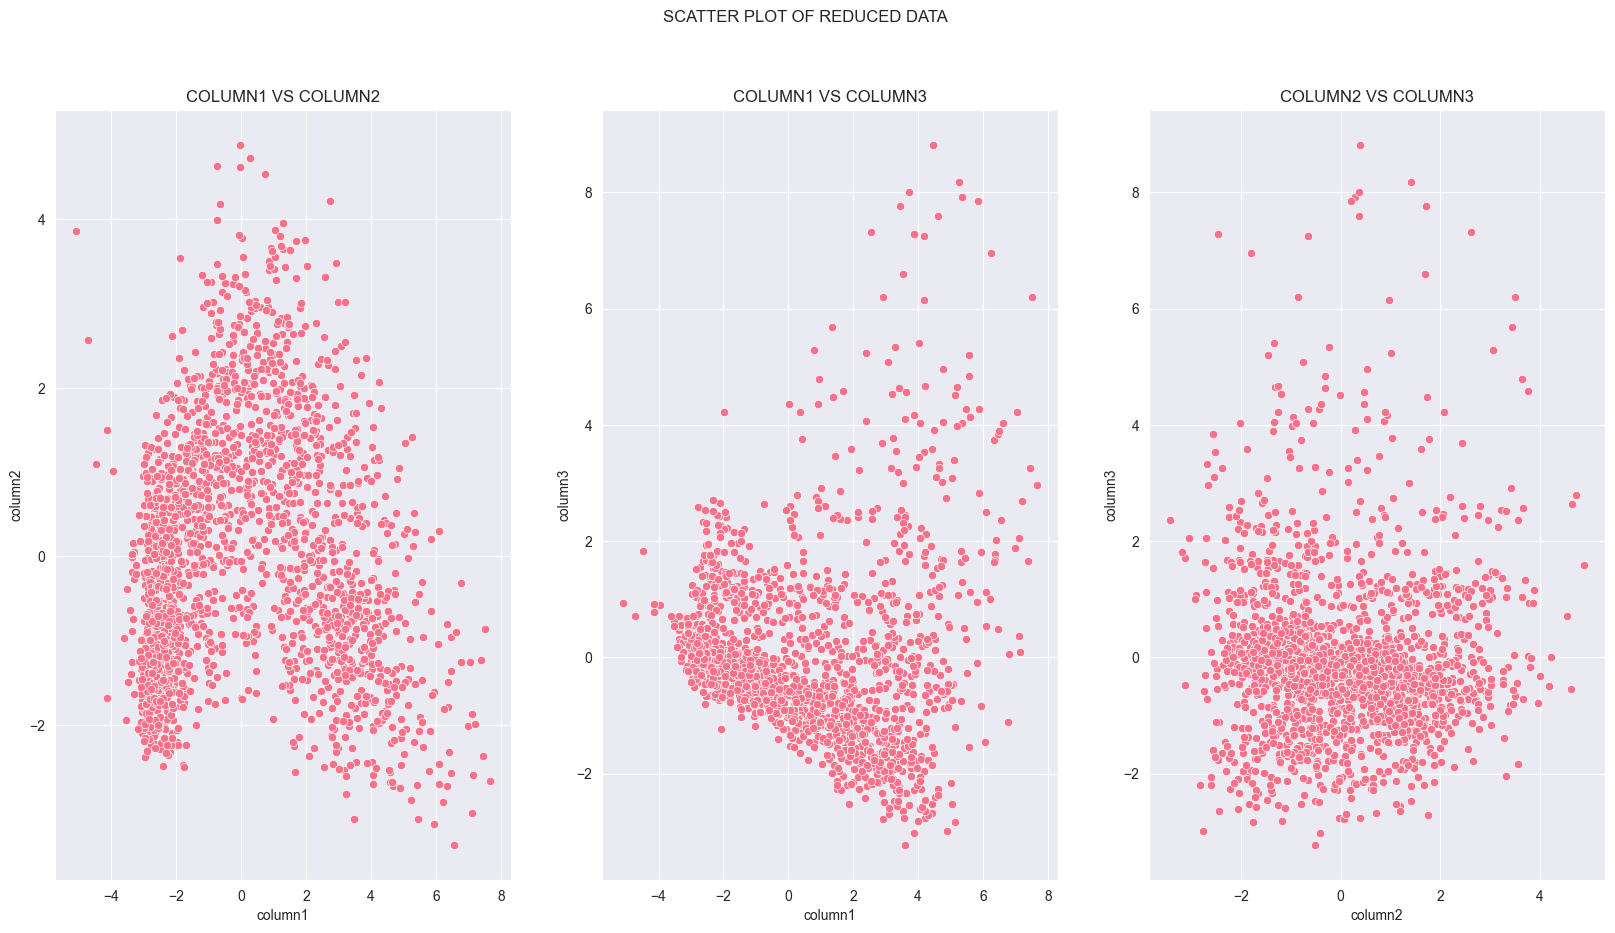

In [18]:
# plotting scatter chart of column relationship

fig, axes = plt.subplots(1,3, figsize= (20, 10))
sns.scatterplot(data= data_reduced, x= 'column1', y= 'column2', ax= axes[0])
sns.scatterplot(data= data_reduced, x= 'column1', y= 'column3', ax= axes[1])
sns.scatterplot(data= data_reduced, x= 'column2', y= 'column3', ax= axes[2])

plt.suptitle('SCATTER PLOT OF REDUCED DATA')

axes[0].set_title('COLUMN1 VS COLUMN2')
axes[1].set_title('COLUMN1 VS COLUMN3')
axes[2].set_title('COLUMN2 VS COLUMN3')

Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

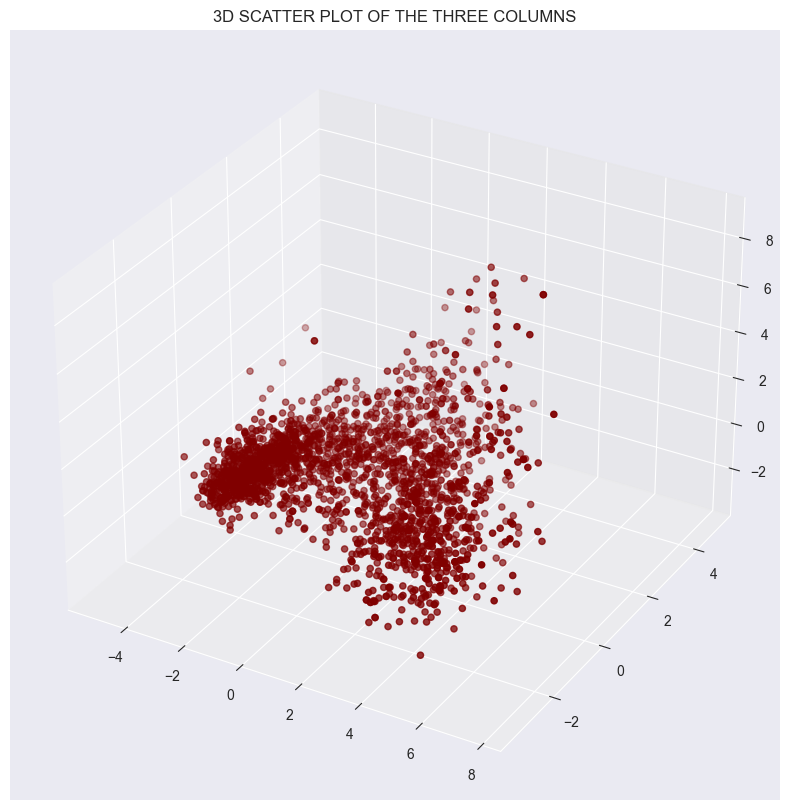

In [19]:
# 3D plot of the reduced dimension plt

x = data_reduced['column1']
y = data_reduced['column2']
z = data_reduced['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c = 'maroon', marker= 'o')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')


In [20]:
# plotly 3d

px.scatter_3d(
    data_frame =  data_reduced, x= 'column1', y= 'column2', z= 'column3'
)

In [21]:
# kmeans clustering (this returns partitionaing based on instruction given to it)
# train a kmeans on the best K

kmeans = KMeans(n_clusters= 4)

preds = kmeans.fit_predict(data_reduced)

preds

array([3, 0, 3, ..., 2, 2, 0])

In [22]:
preds[:10]

array([3, 0, 3, 0, 2, 2, 2, 0, 0, 0])

Text(0.5, 0.92, '3D SCATTER PLOT OF THE THREE COLUMNS')

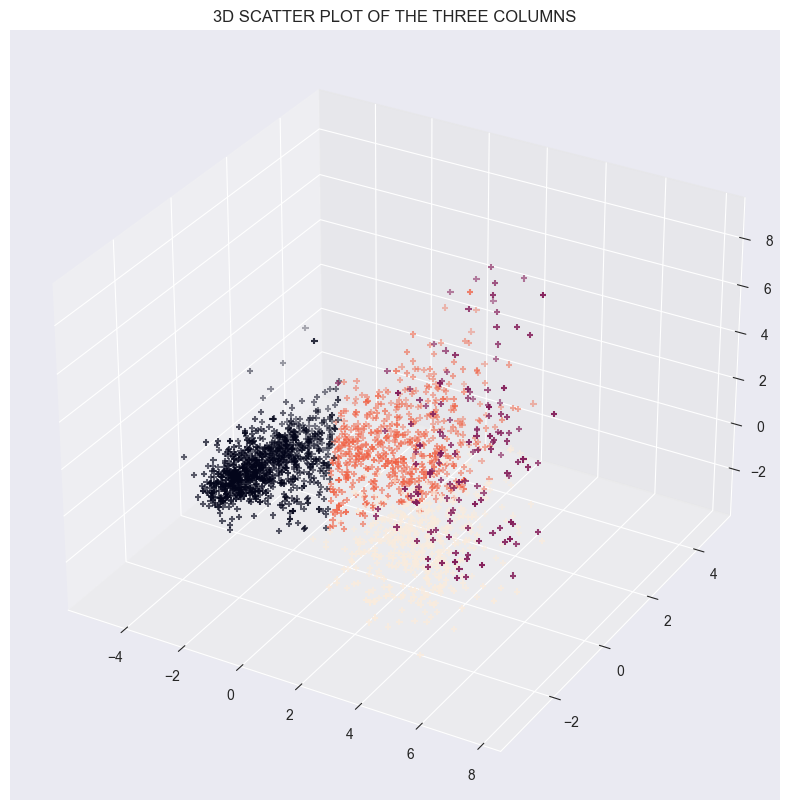

In [23]:
x = data_reduced['column1']
y = data_reduced['column2']
z = data_reduced['column3']

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x,y,z, c= preds, marker= '+')

ax.set_title('3D SCATTER PLOT OF THE THREE COLUMNS')

In [24]:
px.scatter_3d(
    data_frame =  data_reduced, x= 'column1', y= 'column2', z= 'column3', color= preds
)

In [25]:
data['clusters'] = ['cluster1' if x == 0 else 'cluster2' if x == 1
                    else 'cluster3' if x == 2 else 'cluster4' for x in preds]

In [26]:
data.head(4)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,clusters
0,2,4,58138,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,67,cluster4
1,2,4,46344,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,70,cluster1
2,2,2,71613,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,59,cluster4
3,2,2,26646,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,40,cluster1


<Axes: xlabel='clusters', ylabel='children'>

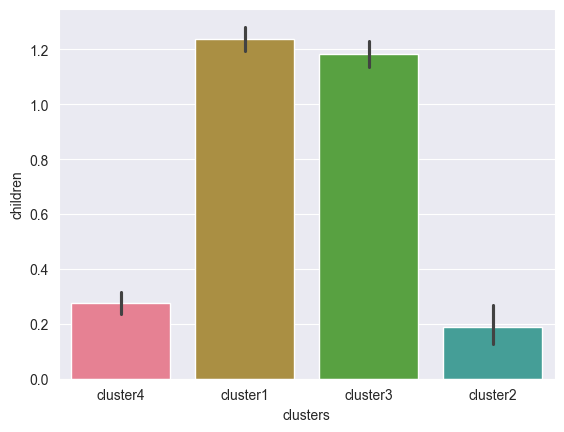

In [27]:
# 3d of reduced dimension with clusters

data['children'] = data['Kidhome'] + data['Teenhome']

sns.barplot(data=data, x = 'clusters', y = 'children', hue= 'clusters')

<Axes: xlabel='clusters', ylabel='children'>

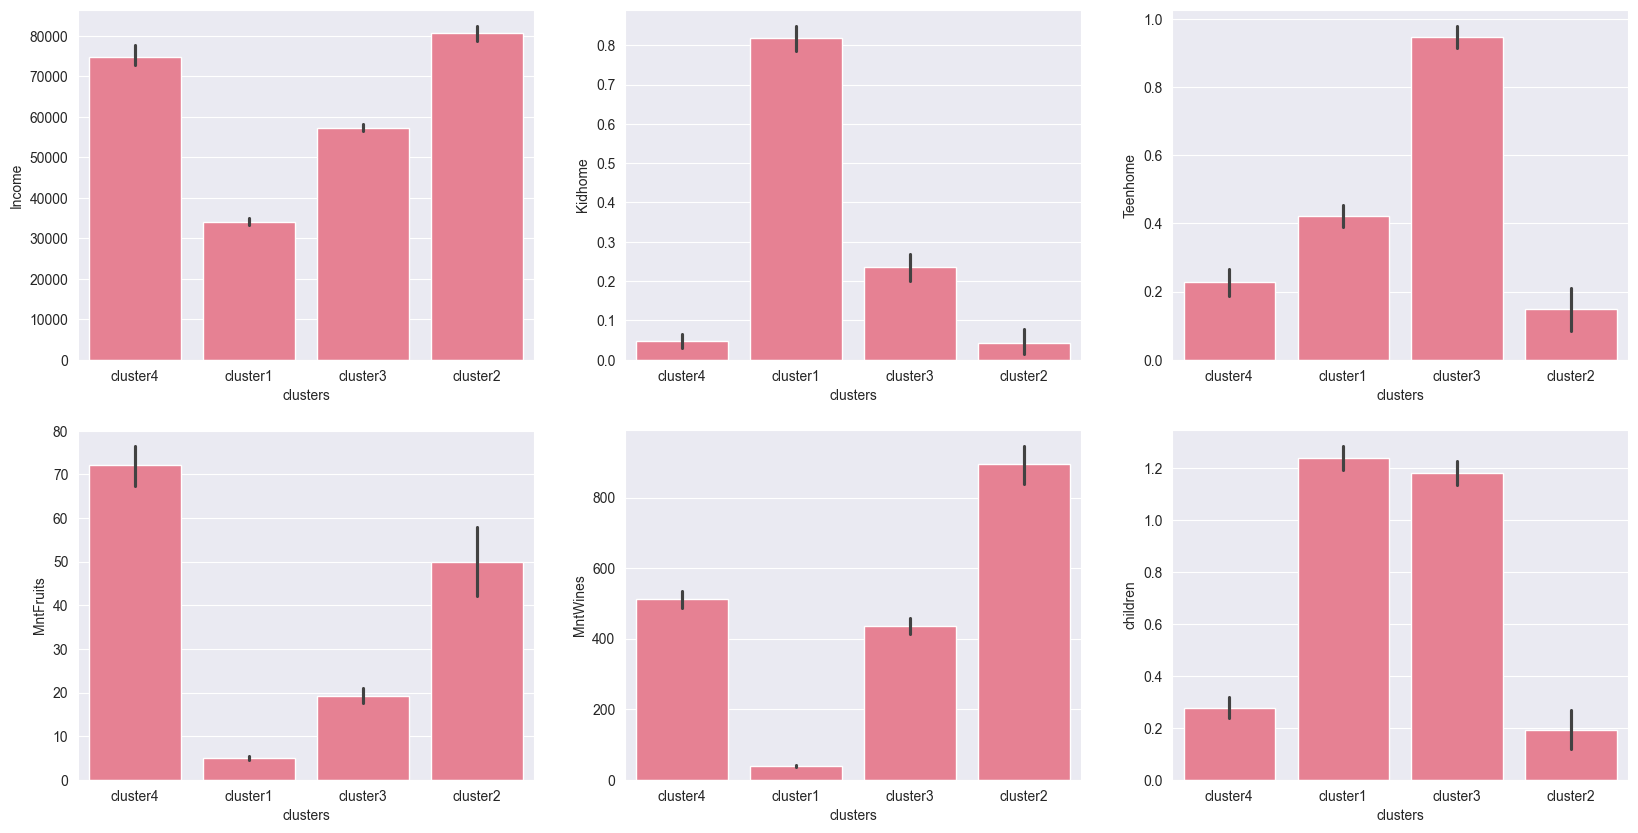

In [28]:
fig, axes = plt.subplots(2,3, figsize= (20, 10))
sns.barplot(data= data, x= 'clusters', y= 'Income', ax= axes[0,0])
sns.barplot(data= data, x= 'clusters', y= 'Kidhome', ax= axes[0,1])
sns.barplot(data= data, x= 'clusters', y= 'Teenhome', ax= axes[0,2])
sns.barplot(data= data, x= 'clusters', y= 'MntFruits', ax= axes[1,0])
sns.barplot(data= data, x= 'clusters', y= 'MntWines', ax= axes[1,1])
sns.barplot(data= data, x= 'clusters', y= 'children', ax= axes[1,2])

<Axes: xlabel='clusters', ylabel='children'>

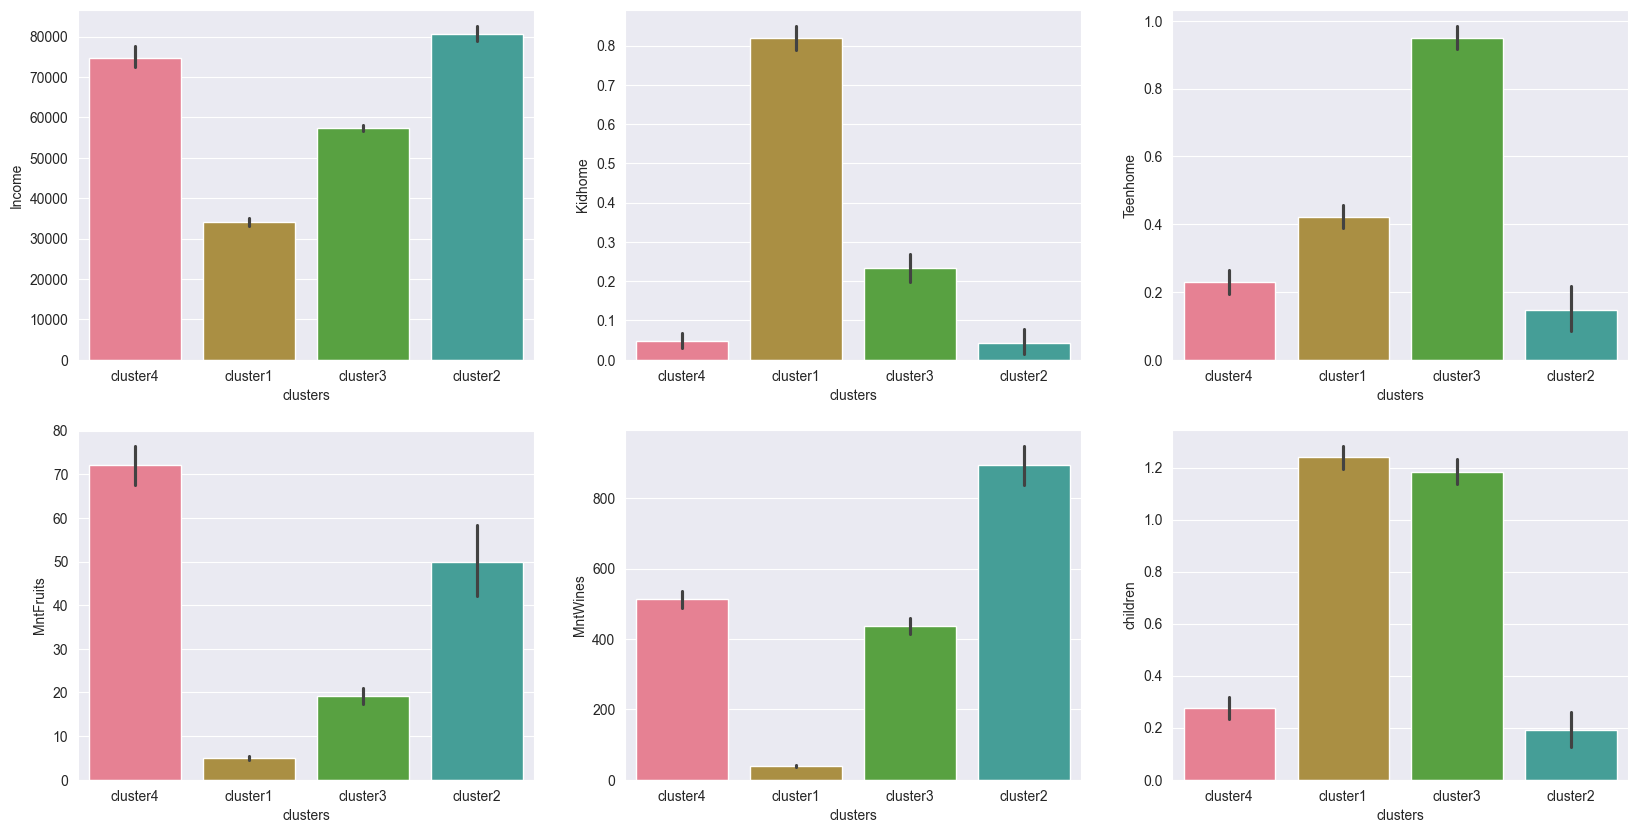

In [29]:
fig, axes = plt.subplots(2,3, figsize= (20, 10))
sns.barplot(data= data, x= 'clusters', y= 'Income', hue= 'clusters', ax= axes[0,0])
sns.barplot(data= data, x= 'clusters', y= 'Kidhome', hue= 'clusters', ax= axes[0,1])
sns.barplot(data= data, x= 'clusters', y= 'Teenhome', hue= 'clusters', ax= axes[0,2])
sns.barplot(data= data, x= 'clusters', y= 'MntFruits', hue= 'clusters', ax= axes[1,0])
sns.barplot(data= data, x= 'clusters', y= 'MntWines', hue= 'clusters', ax= axes[1,1])
sns.barplot(data= data, x= 'clusters', y= 'children', hue= 'clusters', ax= axes[1,2])

#### MODEL EVALUATION AND INTERPRETATION

### CUSTOMER SEGMENTATION PROJECT
#### Findings
Having reduced the dataset into three variables using principal component analysis, the dataset then segmented into 4 clusters. 
The customers in cluster 2 and cluster 4 were earning more than the customers in cluster 3 and cluster 1 and they are the one buying fruits and wines at most. Apart, the customers in cluster 3 and cluster 1 are low earners but they have more kids, teenagers and children than the customers in cluster 4 and cluster 2.
#### Recommendation
Based on the findings above, it is recommended that wine and fruit suppliers should focus most on cluster 4 and cluster 2 customers while suppliers of kid materials should focus on marketing their goods to customers in cluster 1 while those suppliers of teenagers’ materials should focus most on customers in cluster 3.
